In [1]:
from collections import defaultdict

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import h5py
from tenpy.tools import hdf5_io

import os

In [4]:
from spt_classification import to_npc_array, grad_descent_setup, grad_descent_step

# Load data

In [5]:
DATA_DIR = r"data/transverse_cluster_200_site_dmrg"

In [6]:
loaded_data = list()

for local_file_name in os.listdir(DATA_DIR):
    f_name = r"{}/{}".format(DATA_DIR, local_file_name, ignore_unknown=False)
    with h5py.File(f_name, 'r') as f:
        data = hdf5_io.load_from_hdf5(f)
        loaded_data.append(data)

Convert into dictionary

In [7]:
psi_dict[0.1]

NameError: name 'psi_dict' is not defined

In [9]:
from collections import Counter

In [21]:
type(psi_dict[0.0])

tenpy.tools.hdf5_io.Hdf5Ignored

In [24]:
Counter(type(v) for v in psi_dict.values())

Counter({tenpy.tools.hdf5_io.Hdf5Ignored: 21})

In [10]:
Counter(type(v['wavefunction']) for v in loaded_data)

Counter({tenpy.networks.mps.MPS: 21})

In [11]:
b_parameters = sorted(list(d['paramters']['B'] for d in loaded_data))

In [12]:
psi_dict = dict()

In [13]:
for b in b_parameters:
    psi = next(
        d['wavefunction']
        for d in loaded_data
        if d['paramters']['B'] == b
    )

    rounded_b = round(b, 1)
    psi_dict[rounded_b] = psi

In [14]:
list(psi_dict)

[0.0,
 0.1,
 0.2,
 0.3,
 0.4,
 0.5,
 0.6,
 0.7,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.0]

# Symmetry actions

In [15]:
np_X = np.array([[0,1],[1,0]])

In [16]:
np_I = np.array([[1,0],[0,1]])

In [17]:
symmetry_actions = {
    "X1": [np_X, np_I]*15,
    "X2": [np_I, np_X]*15,
    "X12": [np_I, np_X]*15
}

# Testing

In [18]:
results_dict = defaultdict(lambda: defaultdict(dict))

## B=0

In [19]:
b = 0

In [20]:
n=2

In [21]:
for g, u in symmetry_actions.items():
    results_dict[b][g][n] = grad_descent_setup(psi_dict[0], n, u)

AttributeError: 'Hdf5Ignored' object has no attribute 'L'

In [18]:
for _ in range(100):
    grad_descent_step(*results_dict[0]["X1"][n], eta=0.1)

KeyError: 2

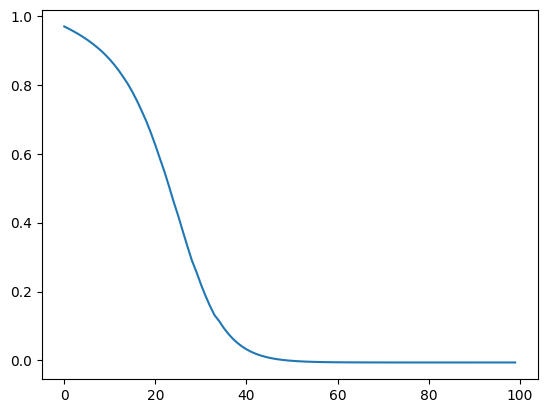

In [52]:
plt.plot(results_dict[0]["X1"][n][-2])

In [53]:
(results_dict[0]["X1"][n][-2][-1], results_dict[0]["X1"][n][-1][-1])

(-0.006011835638604746, 0.0043427575141385955)

In [54]:
for _ in range(100):
    grad_descent_step(*results_dict[0]["X2"][n], eta=0.1)

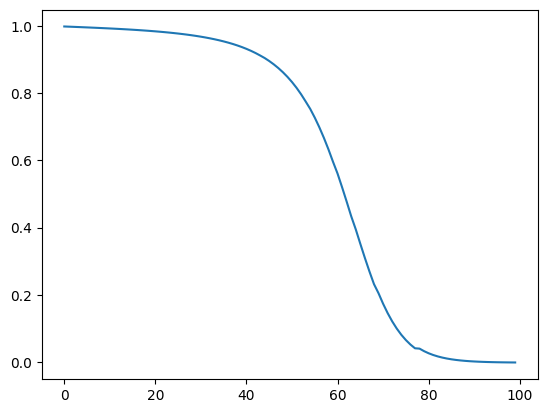

In [55]:
plt.plot(results_dict[0]["X2"][n][-2])

In [56]:
(results_dict[0]["X2"][n][-2][-1], results_dict[0]["X2"][n][-1][-1])

(-0.001561004017589518, 0.0012009862498572055)

In [60]:
for _ in range(100):
    grad_descent_step(*results_dict[0]["X12"][n], eta=0.1)

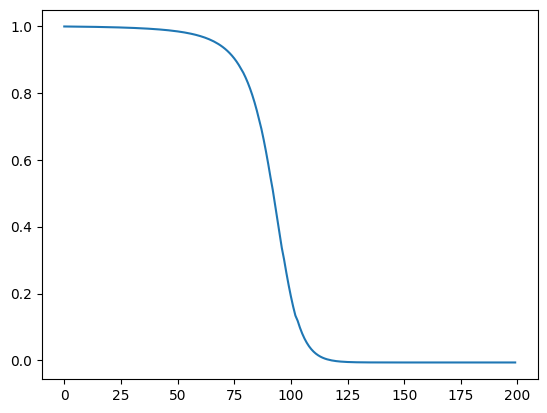

In [61]:
plt.plot(results_dict[0]["X12"][n][-2])

In [62]:
(results_dict[0]["X12"][n][-2][-1], results_dict[0]["X12"][n][-1][-1])

(-0.006224046514958115, 0.0035311244331666103)

## B=0.1

In [63]:
b = 0.1

In [64]:
n=2

In [66]:
for g, u in symmetry_actions.items():
    results_dict[b][g][n] = grad_descent_setup(psi_dict[b], n, u)

In [67]:
for _ in range(100):
    grad_descent_step(*results_dict[b]["X1"][n], eta=0.1)

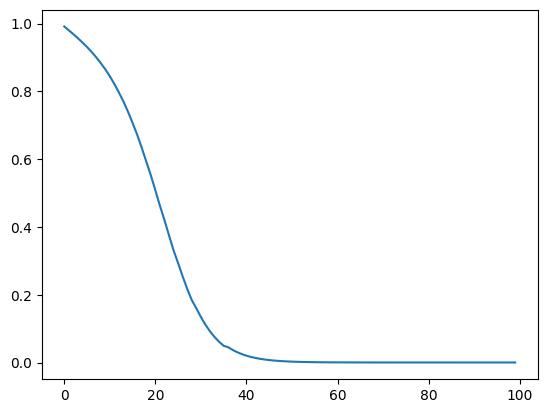

In [68]:
plt.plot(results_dict[b]["X1"][n][-2])

In [69]:
(results_dict[b]["X1"][n][-2][-1], results_dict[b]["X1"][n][-1][-1])

(0.00026828077526286354, 0.0018791872062202675)

In [70]:
for _ in range(100):
    grad_descent_step(*results_dict[b]["X2"][n], eta=0.1)

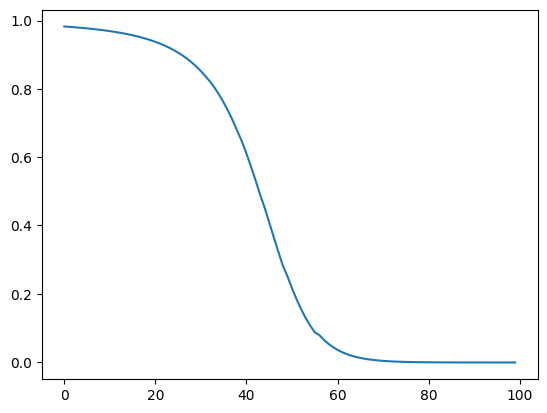

In [71]:
plt.plot(results_dict[b]["X2"][n][-2])

In [72]:
(results_dict[b]["X2"][n][-2][-1], results_dict[b]["X2"][n][-1][-1])

(-0.001474245878150926, 0.0022388355102218593)

In [73]:
for _ in range(100):
    grad_descent_step(*results_dict[b]["X12"][n], eta=0.1)

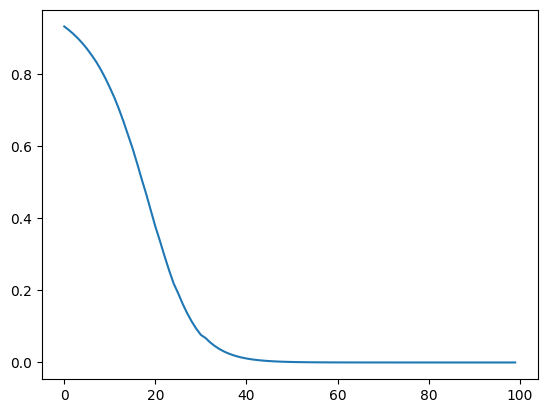

In [74]:
plt.plot(results_dict[b]["X12"][n][-2])

In [75]:
(results_dict[b]["X12"][n][-2][-1], results_dict[b]["X12"][n][-1][-1])

(-0.0008860603651248411, 0.0025993097004333166)

## B=0.2

In [76]:
b = 0.2

In [77]:
n=2

In [78]:
for g, u in symmetry_actions.items():
    results_dict[b][g][n] = grad_descent_setup(psi_dict[b], n, u)

In [79]:
for _ in range(100):
    grad_descent_step(*results_dict[b]["X1"][n], eta=0.1)

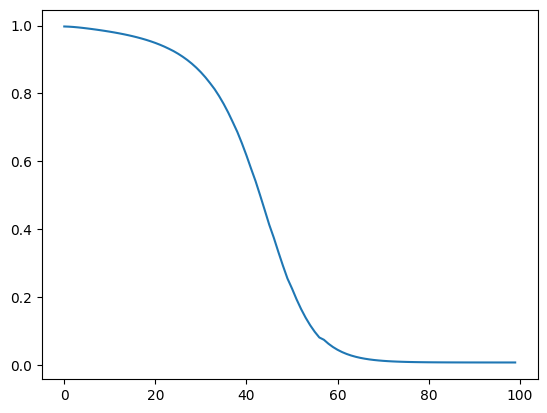

In [80]:
plt.plot(results_dict[b]["X1"][n][-2])

In [81]:
(results_dict[b]["X1"][n][-2][-1], results_dict[b]["X1"][n][-1][-1])

(0.0068542708863744695, 0.002191606394784218)

In [82]:
for _ in range(100):
    grad_descent_step(*results_dict[b]["X2"][n], eta=0.1)

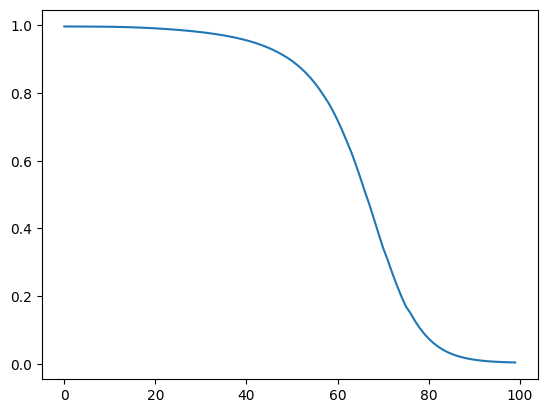

In [83]:
plt.plot(results_dict[b]["X2"][n][-2])

In [84]:
(results_dict[b]["X2"][n][-2][-1], results_dict[b]["X2"][n][-1][-1])

(0.004361244466238645, 0.004475461339558562)

In [88]:
for _ in range(100):
    grad_descent_step(*results_dict[b]["X12"][n], eta=0.1)

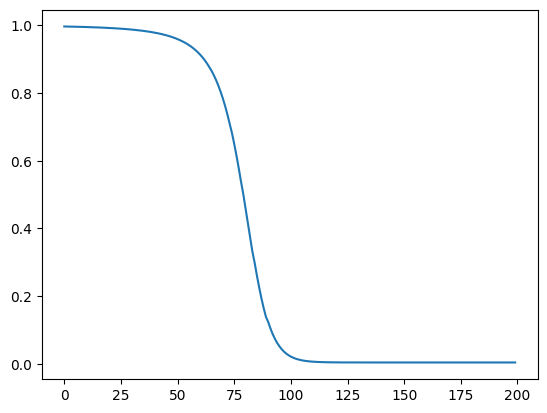

In [89]:
plt.plot(results_dict[b]["X12"][n][-2])

In [90]:
(results_dict[b]["X12"][n][-2][-1], results_dict[b]["X12"][n][-1][-1])

(0.004232969589360147, 0.0033568631732059373)

## B=0.3

In [91]:
b = 0.3

In [92]:
n=2

In [93]:
for g, u in symmetry_actions.items():
    results_dict[b][g][n] = grad_descent_setup(psi_dict[b], n, u)

In [97]:
for _ in range(100):
    grad_descent_step(*results_dict[b]["X1"][n], eta=0.1)

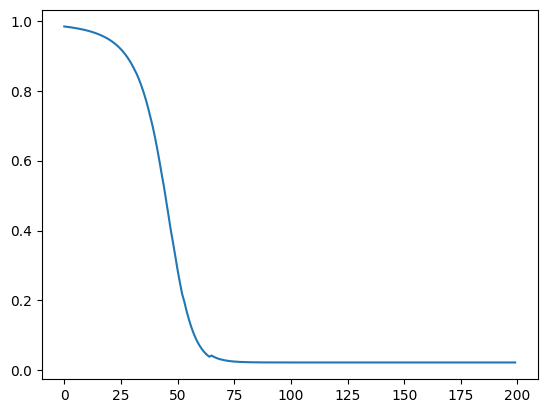

In [98]:
plt.plot(results_dict[b]["X1"][n][-2])

In [99]:
(results_dict[b]["X1"][n][-2][-1], results_dict[b]["X1"][n][-1][-1])

(0.02233603021356423, 0.0006378991259505806)

In [100]:
for _ in range(100):
    grad_descent_step(*results_dict[b]["X2"][n], eta=0.1)

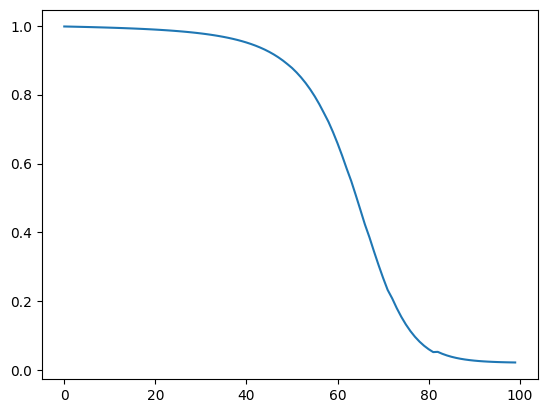

In [101]:
plt.plot(results_dict[b]["X2"][n][-2])

In [102]:
(results_dict[b]["X2"][n][-2][-1], results_dict[b]["X2"][n][-1][-1])

(0.02277159545073515, 0.0009924989569856102)

In [103]:
for _ in range(100):
    grad_descent_step(*results_dict[b]["X12"][n], eta=0.1)

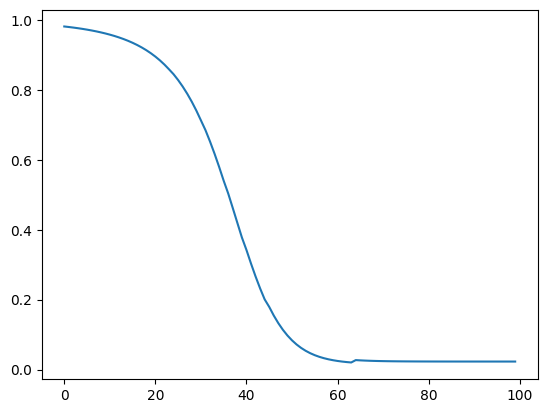

In [104]:
plt.plot(results_dict[b]["X12"][n][-2])

In [75]:
(results_dict[b]["X12"][n][-2][-1], results_dict[b]["X12"][n][-1][-1])

(-0.0008860603651248411, 0.0025993097004333166)

## B=0.4

In [105]:
b = 0.4

In [106]:
n=2

In [107]:
for g, u in symmetry_actions.items():
    results_dict[b][g][n] = grad_descent_setup(psi_dict[b], n, u)

In [108]:
for _ in range(100):
    grad_descent_step(*results_dict[b]["X1"][n], eta=0.1)

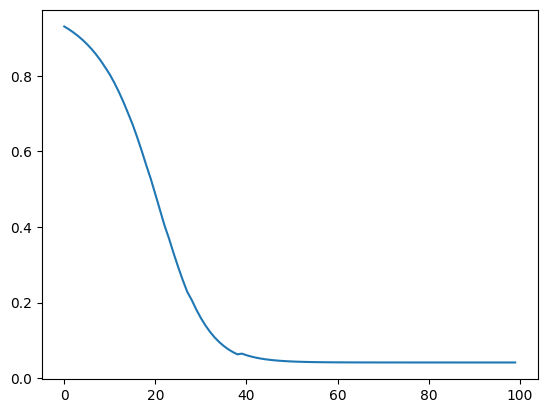

In [109]:
plt.plot(results_dict[b]["X1"][n][-2])

In [110]:
(results_dict[b]["X1"][n][-2][-1], results_dict[b]["X1"][n][-1][-1])

(0.041531227936428494, 0.0007883370289814007)

In [111]:
for _ in range(100):
    grad_descent_step(*results_dict[b]["X2"][n], eta=0.1)

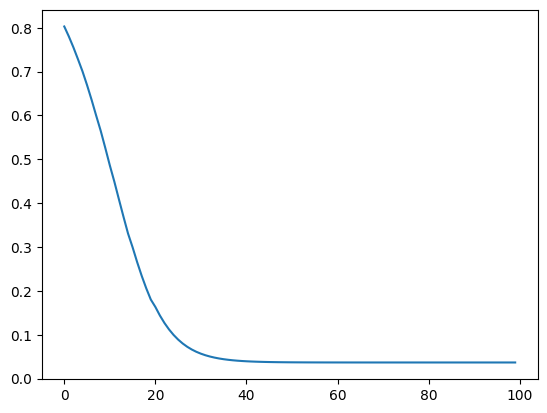

In [112]:
plt.plot(results_dict[b]["X2"][n][-2])

In [113]:
(results_dict[b]["X2"][n][-2][-1], results_dict[b]["X2"][n][-1][-1])

(0.036597215979292774, 0.00472199988255495)

In [114]:
for _ in range(100):
    grad_descent_step(*results_dict[b]["X12"][n], eta=0.1)

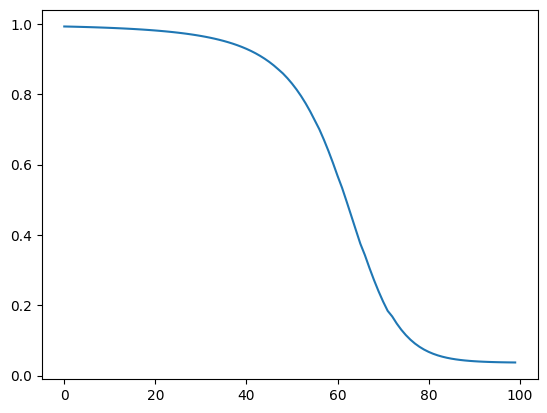

In [115]:
plt.plot(results_dict[b]["X12"][n][-2])

In [116]:
(results_dict[b]["X12"][n][-2][-1], results_dict[b]["X12"][n][-1][-1])

(0.03705401327191016, 0.003924375265691893)

## B=0.5

In [117]:
b = 0.5

In [118]:
n=2

In [119]:
for g, u in symmetry_actions.items():
    results_dict[b][g][n] = grad_descent_setup(psi_dict[b], n, u)

In [120]:
for _ in range(100):
    grad_descent_step(*results_dict[b]["X1"][n], eta=0.1)

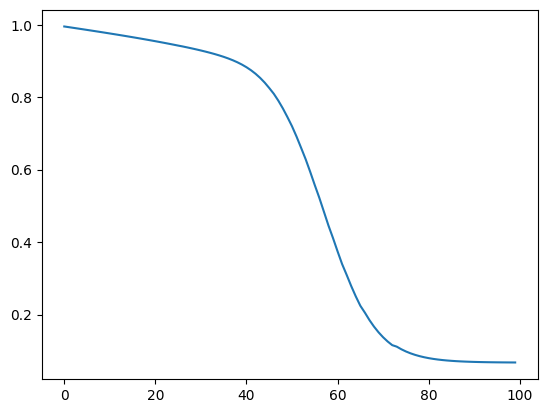

In [121]:
plt.plot(results_dict[b]["X1"][n][-2])

In [122]:
(results_dict[b]["X1"][n][-2][-1], results_dict[b]["X1"][n][-1][-1])

(0.06769530661457734, 0.0023695569004484884)

In [126]:
for _ in range(100):
    grad_descent_step(*results_dict[b]["X2"][n], eta=0.1)

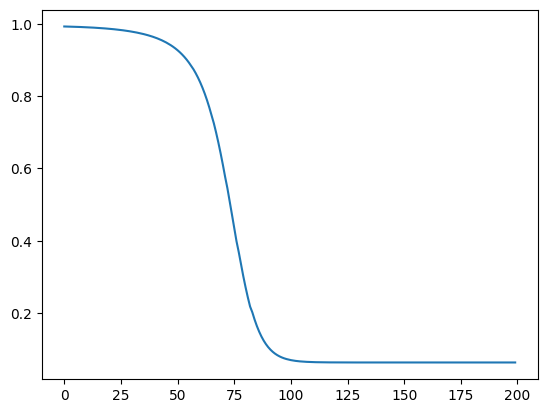

In [127]:
plt.plot(results_dict[b]["X2"][n][-2])

In [128]:
(results_dict[b]["X2"][n][-2][-1], results_dict[b]["X2"][n][-1][-1])

(0.06294266708166274, 0.003995330670820252)

In [129]:
for _ in range(100):
    grad_descent_step(*results_dict[b]["X12"][n], eta=0.1)

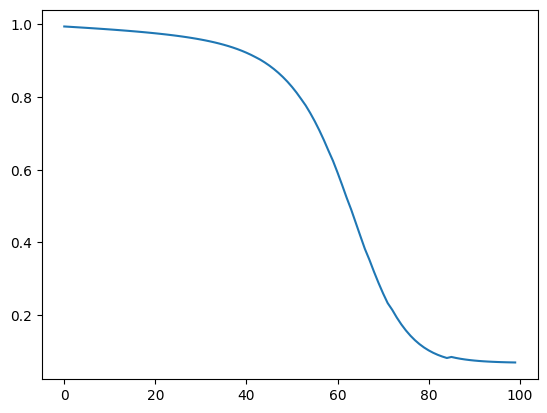

In [130]:
plt.plot(results_dict[b]["X12"][n][-2])

In [131]:
(results_dict[b]["X12"][n][-2][-1], results_dict[b]["X12"][n][-1][-1])

(0.06985589102929557, 0.0005962045332028598)

## B=0.6

In [132]:
b = 0.6

In [133]:
n=2

In [134]:
for g, u in symmetry_actions.items():
    results_dict[b][g][n] = grad_descent_setup(psi_dict[b], n, u)

In [135]:
for _ in range(100):
    grad_descent_step(*results_dict[b]["X1"][n], eta=0.1)

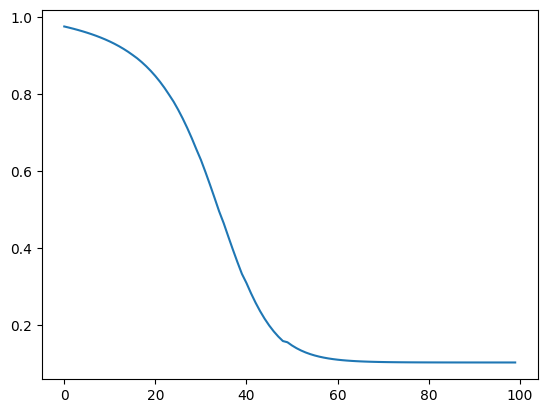

In [136]:
plt.plot(results_dict[b]["X1"][n][-2])

In [137]:
(results_dict[b]["X1"][n][-2][-1], results_dict[b]["X1"][n][-1][-1])

(0.10316833512941004, 0.0016438202908179989)

In [138]:
for _ in range(100):
    grad_descent_step(*results_dict[b]["X2"][n], eta=0.1)

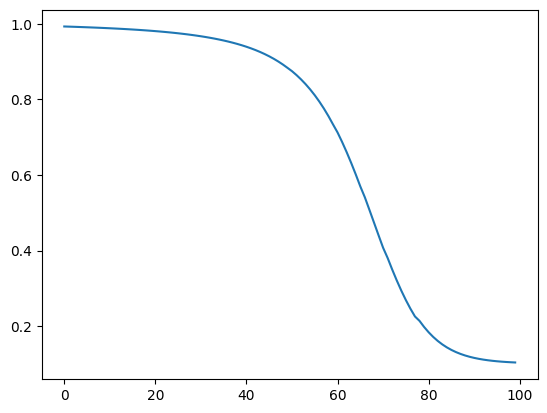

In [139]:
plt.plot(results_dict[b]["X2"][n][-2])

In [140]:
(results_dict[b]["X2"][n][-2][-1], results_dict[b]["X2"][n][-1][-1])

(0.10351210761355512, 0.0037994992243028936)

In [141]:
for _ in range(100):
    grad_descent_step(*results_dict[b]["X12"][n], eta=0.1)

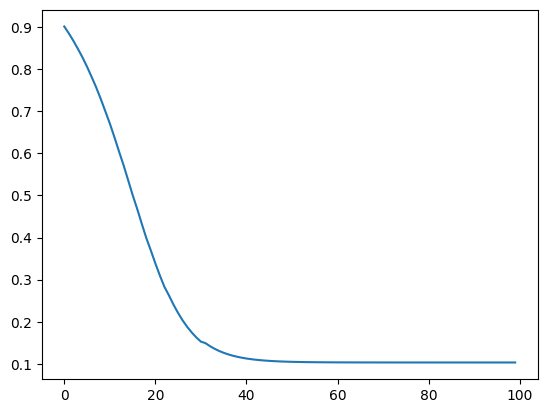

In [142]:
plt.plot(results_dict[b]["X12"][n][-2])

In [143]:
(results_dict[b]["X12"][n][-2][-1], results_dict[b]["X12"][n][-1][-1])

(0.10345861013466573, 0.0019593601568477226)

### n=3
Increase width

In [144]:
n=3

In [145]:
for g, u in symmetry_actions.items():
    results_dict[b][g][n] = grad_descent_setup(psi_dict[b], n, u)

In [149]:
for _ in range(100):
    grad_descent_step(*results_dict[b]["X1"][n], eta=0.1)

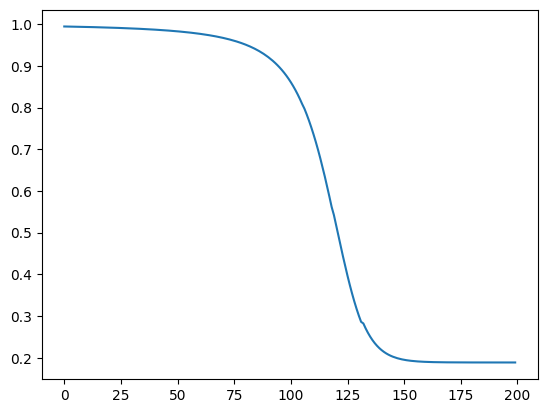

In [150]:
plt.plot(results_dict[b]["X1"][n][-2])

In [151]:
(results_dict[b]["X1"][n][-2][-1], results_dict[b]["X1"][n][-1][-1])

(0.18869712232838443, 0.001884560916140865)

In [152]:
for _ in range(100):
    grad_descent_step(*results_dict[b]["X2"][n], eta=0.1)

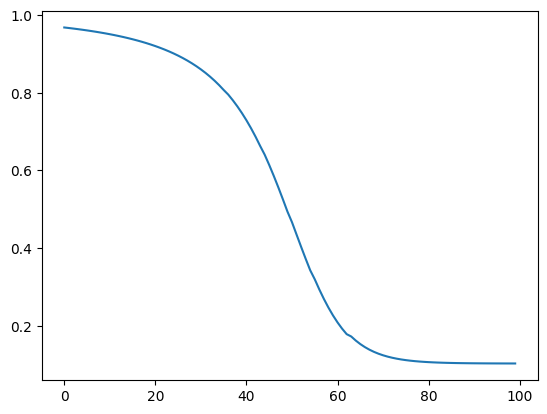

In [153]:
plt.plot(results_dict[b]["X2"][n][-2])

In [154]:
(results_dict[b]["X2"][n][-2][-1], results_dict[b]["X2"][n][-1][-1])

(0.1025199958773485, 0.002554812369092163)

In [155]:
for _ in range(100):
    grad_descent_step(*results_dict[b]["X12"][n], eta=0.1)

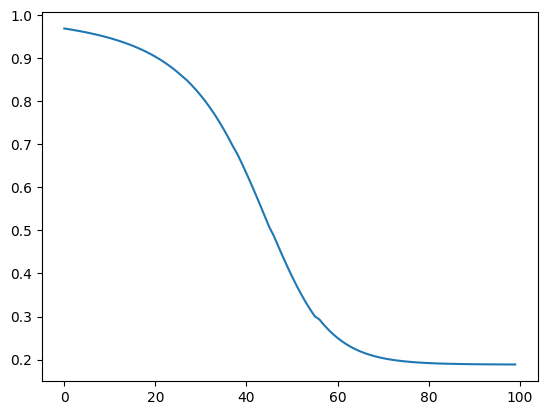

In [156]:
plt.plot(results_dict[b]["X12"][n][-2])

In [157]:
(results_dict[b]["X12"][n][-2][-1], results_dict[b]["X12"][n][-1][-1])

(0.1885013704127978, 0.002369111375567279)

### n=4
Increase width

In [158]:
n=4

In [159]:
for g, u in symmetry_actions.items():
    results_dict[b][g][n] = grad_descent_setup(psi_dict[b], n, u)

In [166]:
for _ in range(100):
    grad_descent_step(*results_dict[b]["X1"][n], eta=0.1)

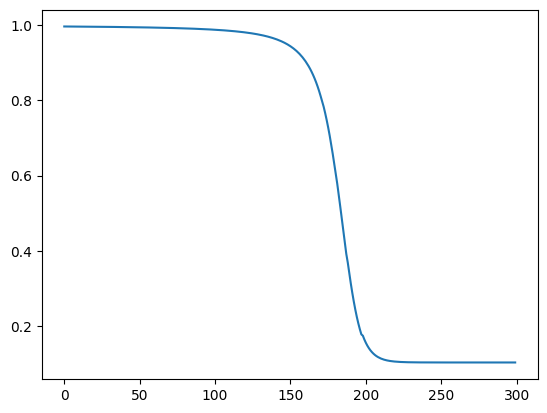

In [167]:
plt.plot(results_dict[b]["X1"][n][-2])

In [168]:
(results_dict[b]["X1"][n][-2][-1], results_dict[b]["X1"][n][-1][-1])

(0.10233372796445206, 0.001876633497130964)

In [169]:
for _ in range(300):
    grad_descent_step(*results_dict[b]["X2"][n], eta=0.1)

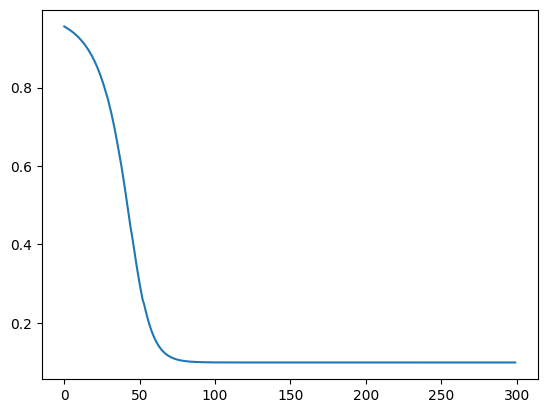

In [170]:
plt.plot(results_dict[b]["X2"][n][-2])

In [171]:
(results_dict[b]["X2"][n][-2][-1], results_dict[b]["X2"][n][-1][-1])

(0.09895776194874029, 0.004318257984762042)

In [175]:
for _ in range(300):
    grad_descent_step(*results_dict[b]["X12"][n], eta=0.1)

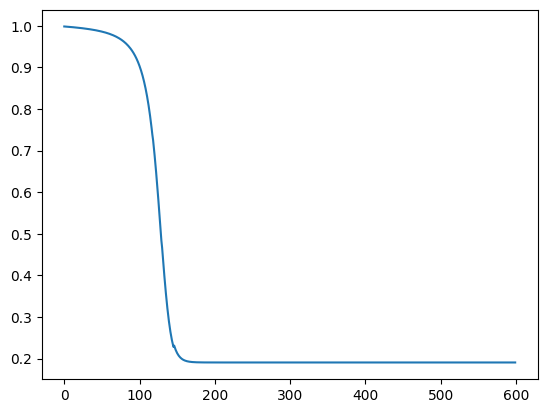

In [176]:
plt.plot(results_dict[b]["X12"][n][-2])

In [177]:
(results_dict[b]["X12"][n][-2][-1], results_dict[b]["X12"][n][-1][-1])

(0.19082751687357402, 0.0008282858887507238)

### n=5
Increase width

In [178]:
n=5

In [179]:
for g, u in symmetry_actions.items():
    results_dict[b][g][n] = grad_descent_setup(psi_dict[b], n, u)

In [183]:
for _ in range(200):
    grad_descent_step(*results_dict[b]["X1"][n], eta=0.1)

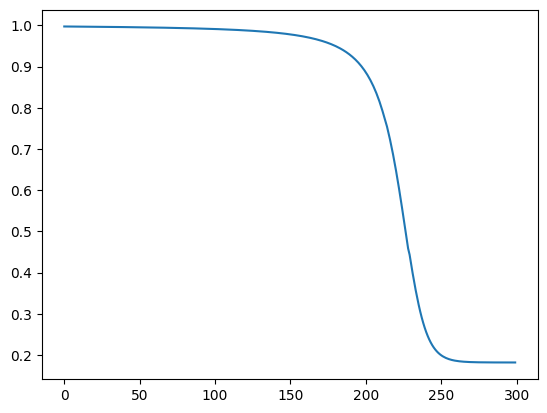

In [184]:
plt.plot(results_dict[b]["X1"][n][-2])

In [185]:
(results_dict[b]["X1"][n][-2][-1], results_dict[b]["X1"][n][-1][-1])

(0.18198017300553992, 0.0039911646226022945)

In [189]:
for _ in range(300):
    grad_descent_step(*results_dict[b]["X2"][n], eta=0.1)

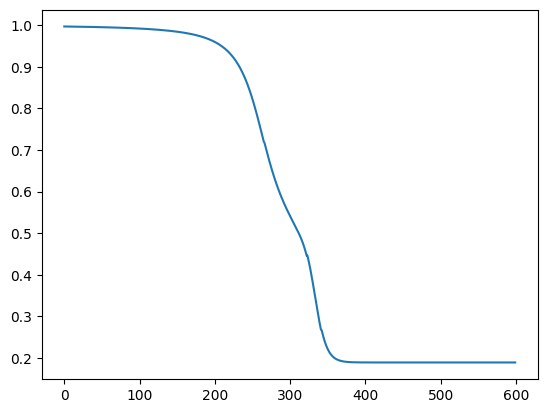

In [190]:
plt.plot(results_dict[b]["X2"][n][-2])

In [191]:
(results_dict[b]["X2"][n][-2][-1], results_dict[b]["X2"][n][-1][-1])

(0.18937437152979708, 0.00240452933392743)

In [195]:
for _ in range(400):
    grad_descent_step(*results_dict[b]["X12"][n], eta=0.1)

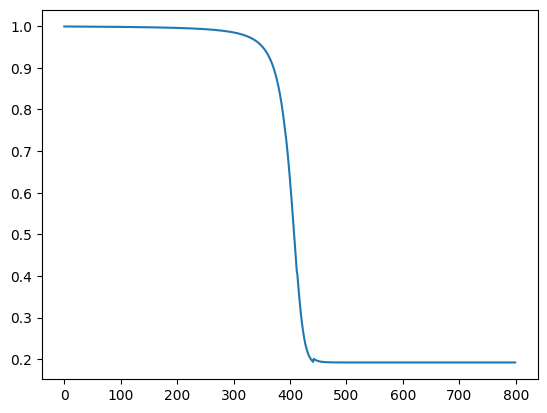

In [196]:
plt.plot(results_dict[b]["X12"][n][-2])

In [197]:
(results_dict[b]["X12"][n][-2][-1], results_dict[b]["X12"][n][-1][-1])

(0.19210841354039232, 0.00034411642823961586)

## Test on other wavefunctions
### B=0.1

In [96]:
psi_b01 = next(
    d['wavefunction']
    for d in loaded_data
    if d['paramters']['B'] == 0.1
)   

In [97]:
data_b01_sl = grad_descent_setup(psi_b01, 2, [np_X, np_I]*20)

In [98]:
for _ in range(200):
    grad_descent_step(*data_b01_sl, eta=0.1)

In [99]:
(*_, losses, unitary_scores) = data_b01_sl

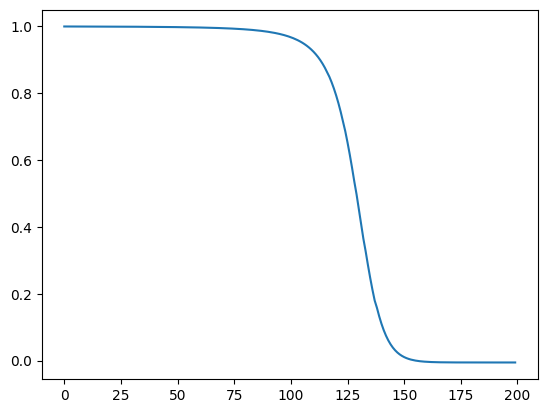

In [100]:
plt.plot(losses)

In [101]:
losses[-1]

-0.005618972178154991

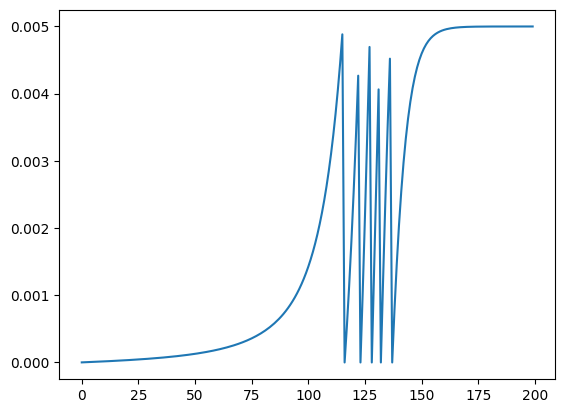

In [102]:
plt.plot(unitary_scores)

In [103]:
data_b01_sr = grad_descent_setup(psi_b01, 2, [np_I, np_X]*20)

In [104]:
for _ in range(200):
    grad_descent_step(*data_b01_sr, eta=0.1)

In [105]:
(*_, losses, unitary_scores) = data_b01_sr

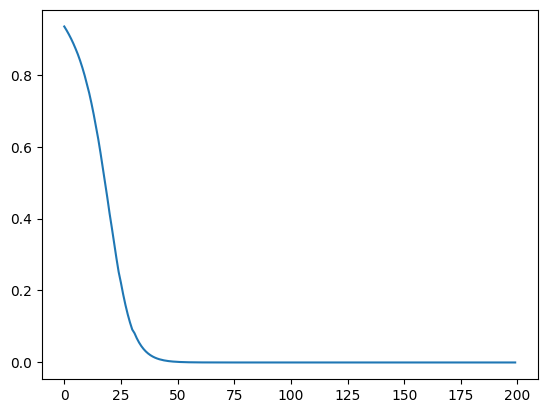

In [106]:
plt.plot(losses)

In [107]:
losses[-1]

-0.0015666398602185438

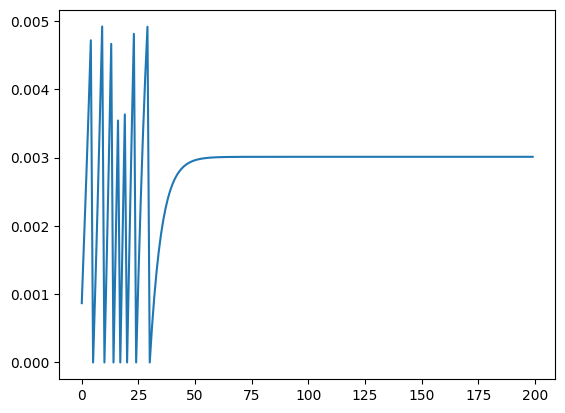

In [108]:
plt.plot(unitary_scores)

In [109]:
data_b01_sb = grad_descent_setup(psi_b01, 2, [np_X, np_X]*20)

In [110]:
for _ in range(300):
    grad_descent_step(*data_b01_sb, eta=0.1)

In [111]:
(*_, losses, unitary_scores) = data_b01_sb

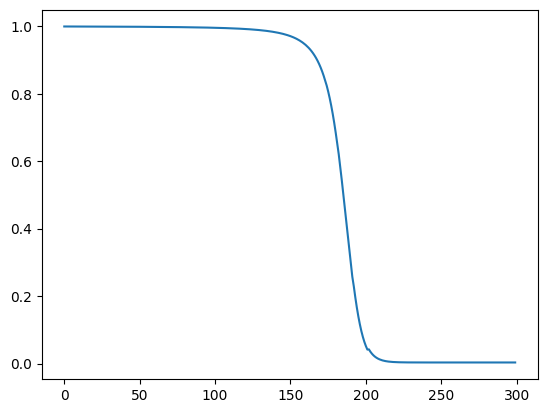

In [112]:
plt.plot(losses)

In [113]:
losses[-1]

0.0030780552672892147

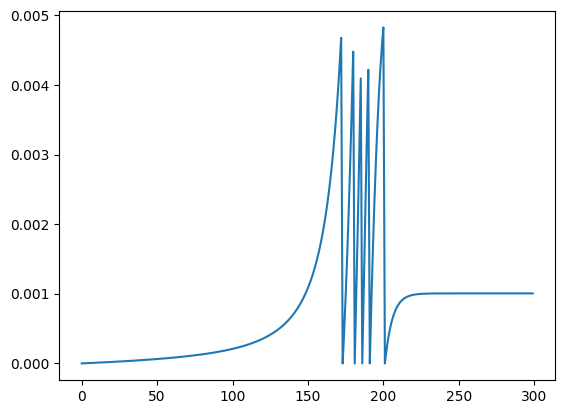

In [114]:
plt.plot(unitary_scores)

In [115]:
extract_left_right_cohomology_phases(
    data_b01_sl[3],
    data_b01_sr[3],
    data_b01_sl[4],
    data_b01_sr[4]
)

((-1-2.7665089151433557e-17j), (-1-2.7560688805525257e-17j))

In [116]:
extract_left_right_cohomology_phases(
    data_b01_sl[3],
    data_b01_sb[3],
    data_b01_sl[4],
    data_b01_sb[4]
)

((-1-6.227666357626422e-17j), (-1+4.1385487841061484e-17j))

In [117]:
extract_left_right_cohomology_phases(
    data_b01_sr[3],
    data_b01_sb[3],
    data_b01_sr[4],
    data_b01_sb[4]
)

((-1+4.1538137462877705e-17j), (-1+8.310067974360291e-17j))

### B=0.5

In [118]:
b_parameters = list(d['paramters']['B'] for d in loaded_data)

In [119]:
b_parameters

[1.3,
 0.4,
 1.7000000000000002,
 1.6,
 0.1,
 1.9000000000000001,
 1.2000000000000002,
 1.8,
 1.4000000000000001,
 2.0,
 0.6000000000000001,
 0.5,
 0.30000000000000004,
 1.5,
 0.9,
 0.7000000000000001,
 0.2,
 0.0,
 1.1,
 0.8,
 1.0]

That's annoying...

In [120]:
psi_05 = next(
    d['wavefunction']
    for d in loaded_data
    if d['paramters']['B'] == 0.5
)   

In [121]:
data_b05_sl_w2 = grad_descent_setup(psi_05, 2, [np_X, np_I]*20)

In [122]:
for _ in range(500):
    grad_descent_step(*data_b05_sl_w2, eta=0.1)

In [123]:
(*_, losses, unitary_scores) = data_b05_sl_w2

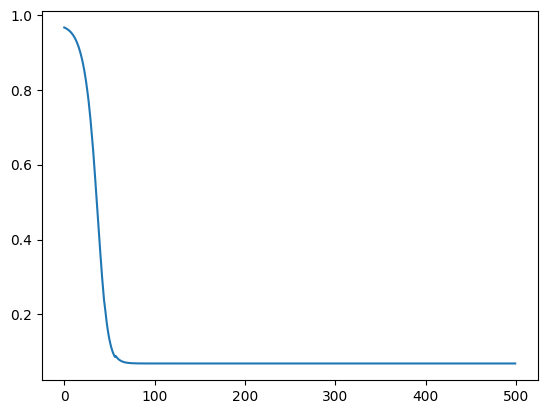

In [124]:
plt.plot(losses)

In [125]:
losses[-1]

0.06845781490598868

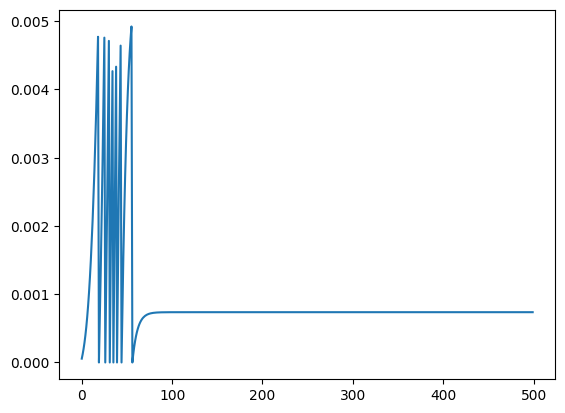

In [126]:
plt.plot(unitary_scores)

In [127]:
data_b05_sr_w2 = grad_descent_setup(psi_05, 2, [np_I, np_X]*20)

In [128]:
for _ in range(500):
    grad_descent_step(*data_b05_sr_w2, eta=0.1)

In [129]:
(*_, losses, unitary_scores) = data_b05_sr_w2

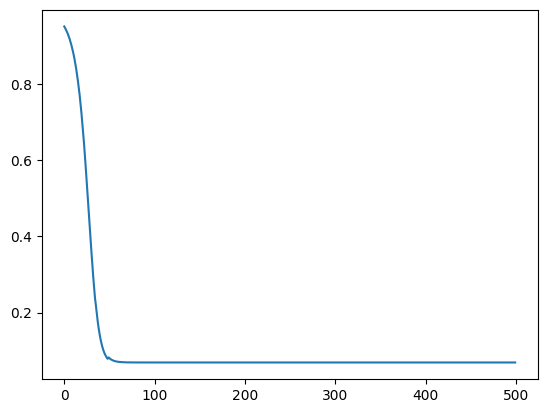

In [130]:
plt.plot(losses)

In [131]:
losses[-1]

0.06876288847406586

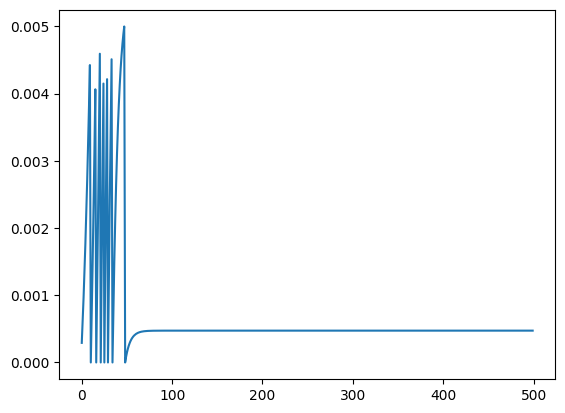

In [132]:
plt.plot(unitary_scores)

In [133]:
data_b05_sb_w2 = grad_descent_setup(psi_05, 2, [np_X, np_X]*20)

In [134]:
for _ in range(500):
    grad_descent_step(*data_b05_sb_w2, eta=0.1)

In [135]:
(*_, losses, unitary_scores) = data_b05_sb_w2

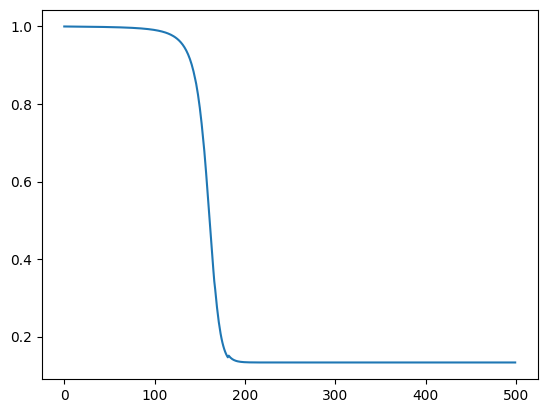

In [136]:
plt.plot(losses)

In [137]:
losses[-1]

0.1331960501603381

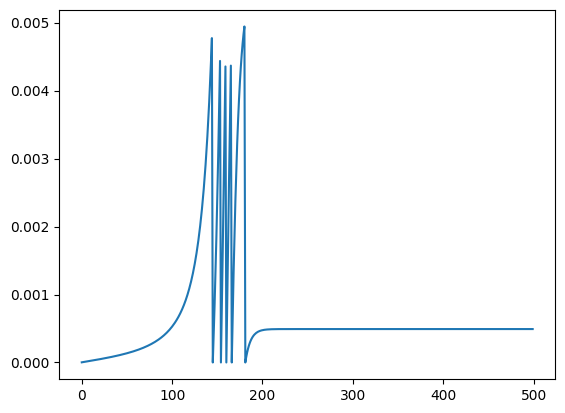

In [138]:
plt.plot(unitary_scores)

This loss doesn't seem to decrease if the unitary wdith is increased...

In [139]:
data_b05_sb_w4 = grad_descent_setup(psi_05, 4, [np_X, np_X]*20)

In [140]:
for _ in range(500):
    grad_descent_step(*data_b05_sb_w4, eta=0.1)

In [141]:
(*_, losses, unitary_scores) = data_b05_sb_w4

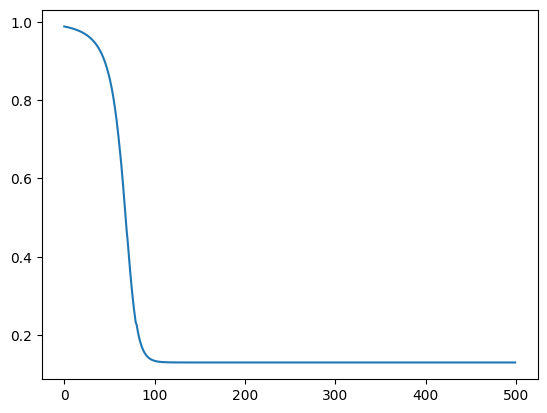

In [142]:
plt.plot(losses)

In [143]:
(losses[-1], unitary_scores[-1])

(0.1297777297120658, 0.002149092853471979)

In [144]:
data_b05_sb_w8 = grad_descent_setup(psi_05, 8, [np_X, np_X]*20)

In [153]:
for _ in range(500):
    grad_descent_step(*data_b05_sb_w8, eta=1)

In [154]:
(*_, losses, unitary_scores) = data_b05_sb_w8

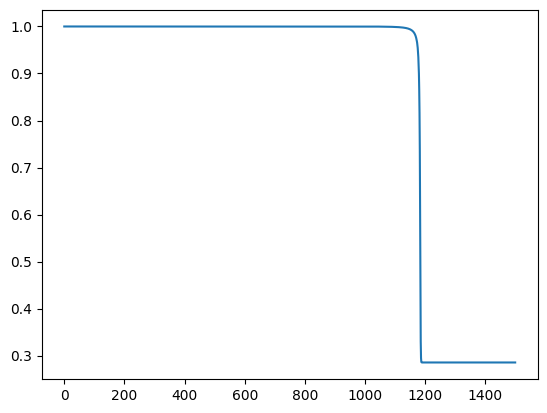

In [155]:
plt.plot(losses)

In [156]:
(losses[-1], unitary_scores[-1])

(0.2853518722284043, 0.001142864456302073)

In [297]:
data_b05_sb_w16 = grad_descent_setup(psi_05, 16, [np_X, np_X]*20)

In [298]:
loss = 1
while loss > 0.5:
    grad_descent_step(*data_b05_sb_w16, eta=20)
    (*_, losses, _) = data_b05_sb_w16
    loss = losses[-1]

In [301]:
for _ in range(500):
    grad_descent_step(*data_b05_sb_w16, eta=0.1)

In [302]:
(*_, losses, unitary_scores) = data_b05_sb_w16

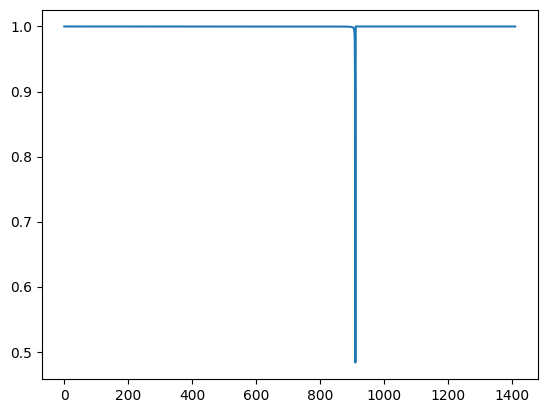

In [303]:
plt.plot(losses)

...huh

In [296]:
(losses[-1], unitary_scores[-1])

(0.47669019099449705, 1.1102230246251565e-15)

In [291]:
min(losses)

0.4023472865754024

Extract cohomology phases

In [234]:
extract_left_right_cohomology_phases(
    data_b05_sl_w2[3],
    data_b05_sr_w2[3],
    data_b05_sl_w2[4],
    data_b05_sr_w2[4]
)

((-1-1.383392213069203e-17j), (-1+1.1032504551845488e-16j))

In [235]:
extract_left_right_cohomology_phases(
    data_b05_sl_w2[3],
    data_b05_sb_w2[3],
    data_b05_sl_w2[4],
    data_b05_sb_w2[4]
)

((-1-8.289942759960176e-17j), (-1+0j))

In [236]:
extract_left_right_cohomology_phases(
    data_b05_sr_w2[3],
    data_b05_sb_w2[3],
    data_b05_sr_w2[4],
    data_b05_sb_w2[4]
)

((-1-1.0380662306880248e-16j), (-1+1.1060006166619062e-16j))

Not using this code anymore...
Add more unitaries, and continue learning.

In [314]:
left_unitaries = data_b05_sl_w2[3].copy()
right_unitaries = data_b05_sl_w2[4].copy()

In [315]:
identity_matrix = np.array([[1,0], [0,1]], dtype='complex128')

In [316]:
left_unitaries = [identity_matrix,] + left_unitaries
right_unitaries.append(identity_matrix)

In [317]:
len(left_unitaries), len(right_unitaries)

(3, 3)

In [321]:
padded_data_b05_sl_w3 = (
    data_b05_sl_w2[:3] +
    (left_unitaries, right_unitaries) +
    (starting_index - 1,) +
    data_b05_sl_w2[6:]
)

In [322]:
len(padded_data_b05_sl_w3) == len(data_b05_sl_w2)

True

In [323]:
for _ in range(500):
    grad_descent_step(*padded_data_b05_sl_w3, eta=0.1)

In [324]:
(*_, losses, unitary_scores) = padded_data_b05_sl_w3

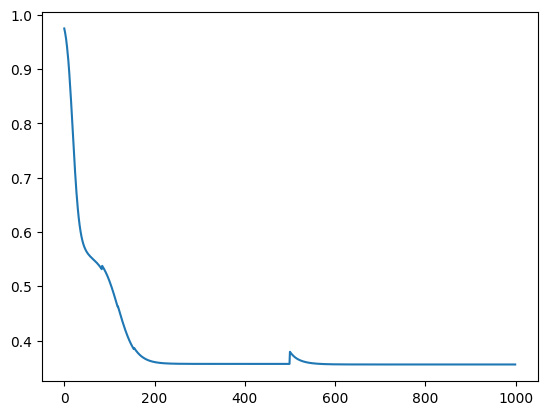

In [325]:
plt.plot(losses)

In [326]:
losses[-1]

0.35584537647591674

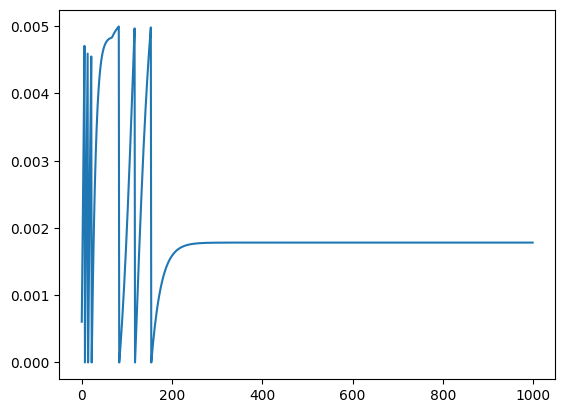

In [327]:
plt.plot(unitary_scores)

No improvement, so start again

In [307]:
data_b05_sl_w3 = grad_descent_setup(test_psi, 2, [np_X, np_I]*20)

In [309]:
for _ in range(500):
    grad_descent_step(*data_b05_sl_w2, eta=0.1)

In [310]:
(*_, losses, unitary_scores) = data_b05_sl_w2

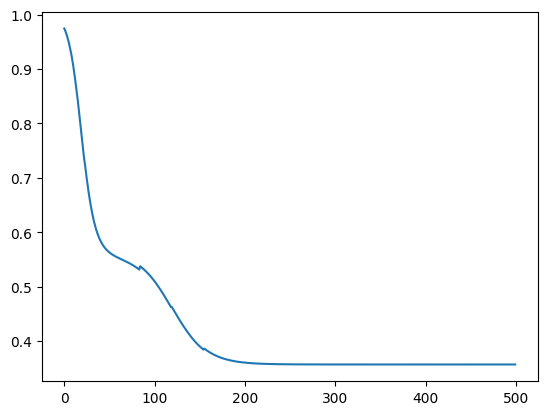

In [311]:
plt.plot(losses)

In [312]:
losses[-1]

0.35690881649743733

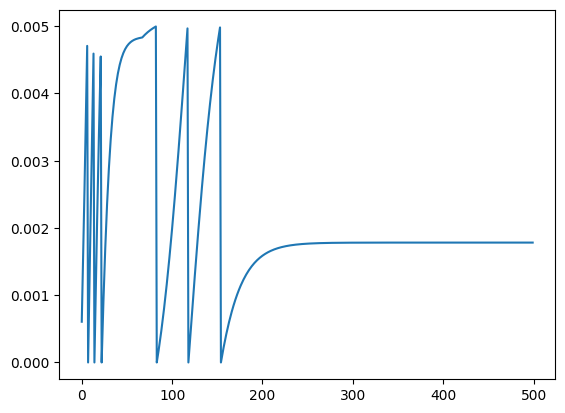

In [313]:
plt.plot(unitary_scores)

### B=0.9

In [237]:
psi_09 = next(
    d['wavefunction']
    for d in loaded_data
    if d['paramters']['B'] == 0.9
)   

In [238]:
data_b09_sl_w2 = grad_descent_setup(psi_09, 2, [np_X, np_I]*30)

In [239]:
for _ in range(500):
    grad_descent_step(*data_b09_sl_w2, eta=0.1)

In [240]:
(*_, losses, unitary_scores) = data_b09_sl_w2

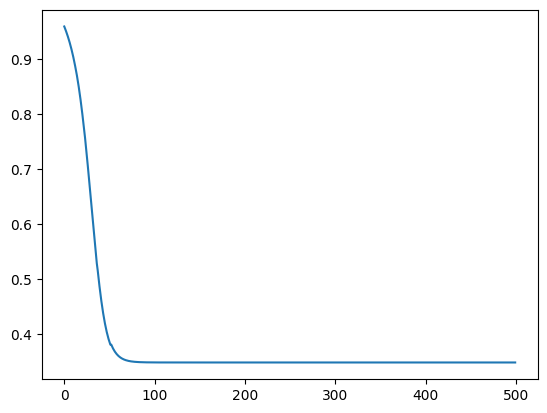

In [241]:
plt.plot(losses)

In [242]:
(losses[-1], unitary_scores[-1])

(0.34903122407072773, 0.0011358450623486505)

In [243]:
data_b09_sr_w2 = grad_descent_setup(psi_09, 2, [np_I, np_X]*30)

In [244]:
for _ in range(500):
    grad_descent_step(*data_b09_sr_w2, eta=0.1)

In [245]:
(*_, losses, unitary_scores) = data_b09_sr_w2

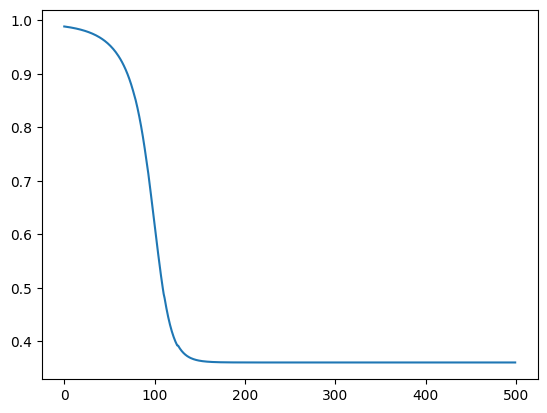

In [246]:
plt.plot(losses)

In [247]:
(losses[-1], unitary_scores[-1])

(0.3606021342416814, 0.002057565319054655)

In [248]:
data_b09_sb_w2 = grad_descent_setup(psi_09, 2, [np_X, np_X]*30)

In [249]:
for _ in range(500):
    grad_descent_step(*data_b09_sb_w2, eta=0.1)

In [250]:
(*_, losses, unitary_scores) = data_b09_sb_w2

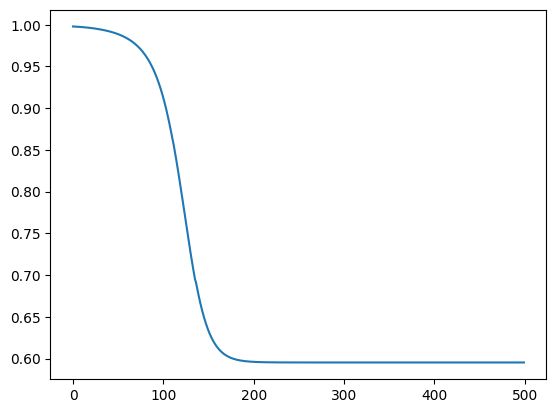

In [251]:
plt.plot(losses)

In [252]:
(losses[-1], unitary_scores[-1])

(0.5952404183078261, 0.0028562175835431525)

Extract cohomology phases

In [253]:
extract_left_right_cohomology_phases(
    data_b09_sl_w2[3],
    data_b09_sr_w2[3],
    data_b09_sl_w2[4],
    data_b09_sr_w2[4]
)

((-0.9999999999999999+2.0582131469894042e-17j), (-1-5.492673871663631e-17j))

In [254]:
extract_left_right_cohomology_phases(
    data_b09_sl_w2[3],
    data_b09_sb_w2[3],
    data_b09_sl_w2[4],
    data_b09_sb_w2[4]
)

((-1+5.529024971691232e-17j), (-1+7.709870254863923e-17j))

In [255]:
extract_left_right_cohomology_phases(
    data_b09_sr_w2[3],
    data_b09_sb_w2[3],
    data_b09_sr_w2[4],
    data_b09_sb_w2[4]
)

((-1-6.894062047576516e-17j), (-1+8.658833285659784e-17j))

### B=1.1

In [448]:
psi_11 = next(
    d['wavefunction']
    for d in loaded_data
    if d['paramters']['B'] == 1.1
)   

In [452]:
data_b11_sl_w2 = grad_descent_setup(psi_11, 2, [np_X, np_I]*30)

In [453]:
for _ in range(500):
    grad_descent_step(*data_b11_sl_w2, eta=0.1)

In [454]:
(*_, losses, unitary_scores) = data_b11_sl_w2

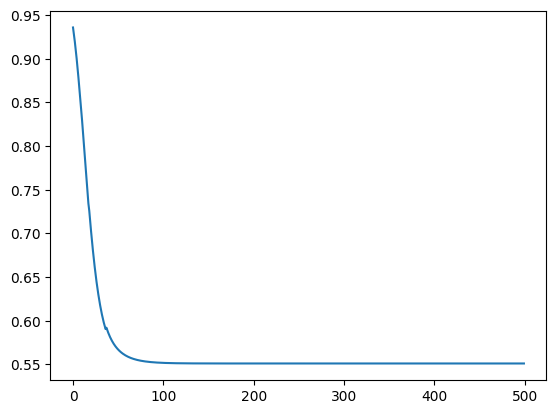

In [455]:
plt.plot(losses)

In [456]:
(losses[-1], unitary_scores[-1])

(0.5508770573736291, 0.0022556658046062328)

In [457]:
data_b11_sr_w2 = grad_descent_setup(psi_11, 2, [np_I, np_X]*30)

In [458]:
for _ in range(500):
    grad_descent_step(*data_b11_sr_w2, eta=0.1)

In [459]:
(*_, losses, unitary_scores) = data_b11_sr_w2

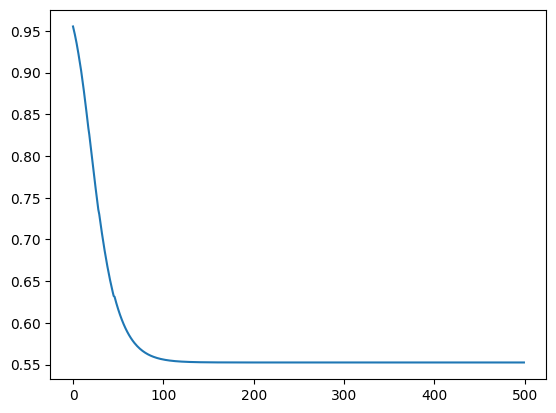

In [460]:
plt.plot(losses)

In [461]:
(losses[-1], unitary_scores[-1])

(0.5524292204259074, 0.004142732677526073)

In [462]:
data_b11_sb_w2 = grad_descent_setup(psi_11, 2, [np_X, np_X]*30)

In [463]:
for _ in range(500):
    grad_descent_step(*data_b11_sb_w2, eta=0.1)

In [464]:
(*_, losses, unitary_scores) = data_b11_sb_w2

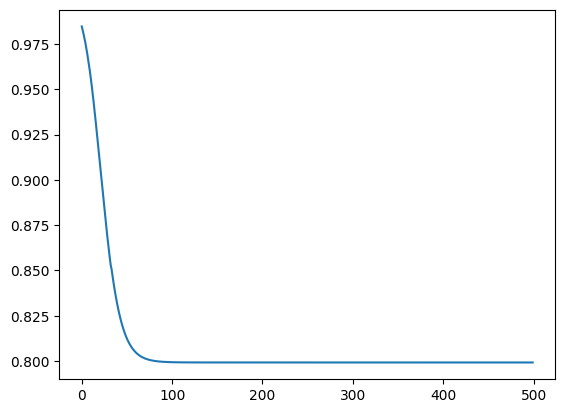

In [465]:
plt.plot(losses)

In [466]:
(losses[-1], unitary_scores[-1])

(0.7991723656158981, 0.0030952929775180937)

Extract cohomology phases

In [467]:
extract_left_right_cohomology_phases(
    data_b11_sl_w2[3],
    data_b11_sr_w2[3],
    data_b11_sl_w2[4],
    data_b11_sr_w2[4]
)

((1-5.5379015923639576e-17j), (1-4.1547646739246686e-17j))

In [468]:
extract_left_right_cohomology_phases(
    data_b11_sl_w2[3],
    data_b11_sb_w2[3],
    data_b11_sl_w2[4],
    data_b11_sb_w2[4]
)

((1-4.1581942719849055e-17j), (1+2.76590727016589e-17j))

In [469]:
extract_left_right_cohomology_phases(
    data_b11_sr_w2[3],
    data_b11_sb_w2[3],
    data_b11_sr_w2[4],
    data_b11_sb_w2[4]
)

((1-2.7747125816421663e-17j), (1-2.42494969546378e-17j))

## B=2

In [147]:
psi_b2 = next(
    d['wavefunction']
    for d in loaded_data
    if d['paramters']['B'] == 2
)   

In [194]:
data_b2_sl = grad_descent_setup(psi_b2, 8, [np_X, np_I]*20)

In [203]:
for _ in range(500):
    grad_descent_step(*data_b2_sl, eta=0.1)

In [204]:
(*_, losses, unitary_scores) = data_b2_sl

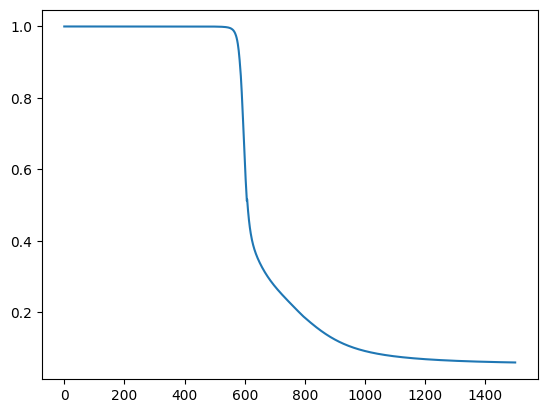

In [205]:
plt.plot(losses)

In [206]:
losses[-1]

0.05960599795016419

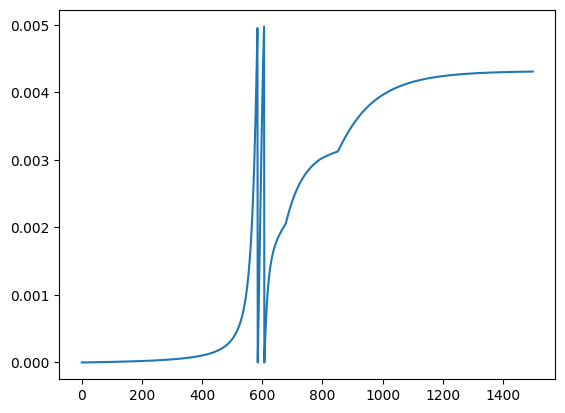

In [207]:
plt.plot(unitary_scores)

In [277]:
data_b2_sr = grad_descent_setup(psi_b2, 8, [np_I, np_X]*20)

In [286]:
for _ in range(100):
    grad_descent_step(*data_b2_sr, eta=0.01)

In [287]:
(*_, losses, unitary_scores) = data_b2_sr

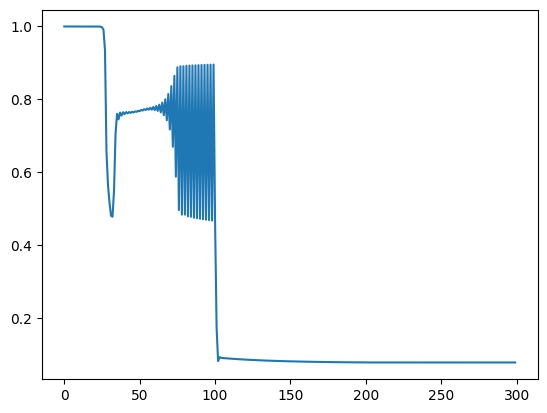

In [288]:
plt.plot(losses)

In [289]:
losses[-1]

0.07835060842494979

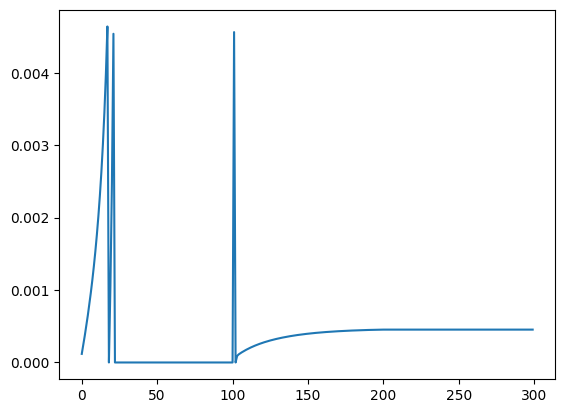

In [290]:
plt.plot(unitary_scores)

In [292]:
data_b2_sb = grad_descent_setup(psi_b2, 8, [np_X, np_X]*20)

In [296]:
for _ in range(100):
    grad_descent_step(*data_b2_sb, eta=0.03)

In [297]:
(*_, losses, unitary_scores) = data_b2_sb

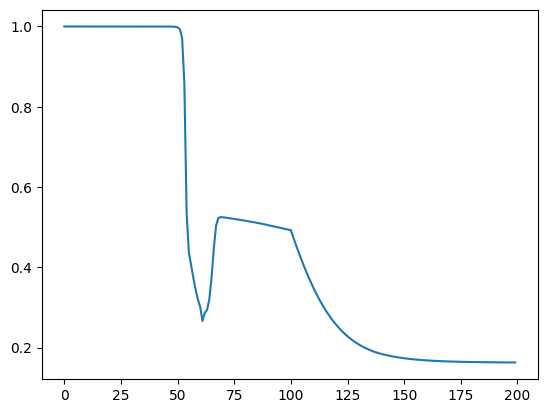

In [298]:
plt.plot(losses)

In [299]:
losses[-1]

0.16302224522649478

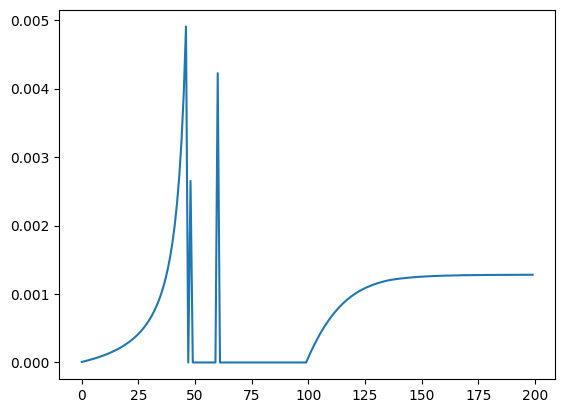

In [300]:
plt.plot(unitary_scores)

In [301]:
extract_left_right_cohomology_phases(
    data_b2_sl[3],
    data_b2_sr[3],
    data_b2_sl[4],
    data_b2_sr[4]
)

((1+3.592437520339363e-18j), (1-5.861598361481182e-17j))

In [302]:
extract_left_right_cohomology_phases(
    data_b2_sl[3],
    data_b2_sb[3],
    data_b2_sl[4],
    data_b2_sb[4]
)

((1-4.0749306578459838e-19j), (1+6.586329295020432e-17j))

In [303]:
extract_left_right_cohomology_phases(
    data_b2_sr[3],
    data_b2_sb[3],
    data_b2_sr[4],
    data_b2_sb[4]
)

((1+1.4093646537662805e-16j), (1+5.022565751916143e-17j))

# Old code

In [116]:
def matrix_element_gradient(psi, symmetry_operations, left_unitaries,
                            right_unitaries, unitary_index, starting_psi_index):
    left_npc_unitaries = [to_npc_array(u) for u in left_unitaries]
    right_npc_unitaries = [to_npc_array(u) for u in right_unitaries]

    assert (unitary_index >= 0) and (unitary_index < len(left_unitaries) + len(right_unitaries))
    if unitary_index < len(left_unitaries):
        left_ops = left_npc_unitaries[:unitary_index]
        right_ops = left_npc_unitaries[unitary_index+1:] + symmetry_operations + right_npc_unitaries
    else:
        shifted_index = unitary_index - len(left_unitaries)
        left_ops = left_npc_unitaries + symmetry_operations + right_npc_unitaries[:shifted_index]
        right_ops = right_npc_unitaries[shifted_index+1:]

    starting_index = get_starting_index(psi, symmetry_operations, left_unitaries, right_unitaries)

    out = np.zeros((2,2),dtype='complex')
    
    for i in range(2):
        for j in range(2):
            delta_U = np.zeros((2,2),dtype='complex')
            delta_U[i,j] = 1
            ops_list = left_ops + [to_npc_array(delta_U),] + right_ops
            out[i,j] = psi.expectation_value_multi_sites(ops_list, starting_psi_index)
    
    return out

In [77]:
def all_matrix_element_gradients(psi, symmetry_operations, left_unitaries, right_unitaries):
    left_outs = list()

    for unitary_index in range(len(left_unitaries)):
        left_outs.append(matrix_element_gradient(psi, symmetry_operations, left_unitaries, right_unitaries, unitary_index))

    right_outs = list()

    for unitary_index in range(len(right_unitaries)):
        right_outs.append(matrix_element_gradient(psi, symmetry_operations, left_unitaries, right_unitaries, unitary_index+len(left_unitaries)))

    return (left_outs, right_outs)

In [149]:
def update(psi, symmetry_operations, left_unitaries, right_unitaries, losses, unitary_test_scores, eta=0.03, unitary_tol = 0.005):
    M = matrix_element(psi, symmetry_operations, left_unitaries, right_unitaries)

    left_gradients, right_gradients = all_matrix_element_gradients(psi, symmetry_operations, left_unitaries, right_unitaries)

    for u,d in zip(left_unitaries, left_gradients):
        grad = -2*M*np.conj(d)
        u += -eta*projector(u, grad)

    for u,d in zip(right_unitaries, right_gradients):
        grad = -2*M*np.conj(d)
        u += -eta*projector(u, grad)

    losses.append(loss(psi, symmetry_operations, left_unitaries, right_unitaries))

    all_unitaries = left_unitaries + right_unitaries

    any_unitary_fail = any(
        unitary_test(u) > unitary_tol
        for u in all_unitaries
    )

    if any_unitary_fail:
        for i in range(len(left_unitaries)):
            u = left_unitaries[i]
            left_unitaries[i] = unitarize_matrix(u)
        for i in range(len(right_unitaries)):
            u = right_unitaries[i]
            right_unitaries[i] = unitarize_matrix(u)

    current_unitary_test_scores = [unitary_test(u) for u in all_unitaries]
    unitary_test_scores.append(current_unitary_test_scores)
    
    pass

In [100]:
def sample_unitaries(n):
    unitary_sampler = unitary_group(2)

    samples = [unitary_sampler.rvs() for _ in range(n)]

    return samples

In [150]:
single_losses = list()
single_unitary_scores = list()

left_unitaries = sample_unitaries(1)
right_unitaries = sample_unitaries(1)

In [167]:
single_symmetry_operations = transverse_cluster_symmetry_operation("single", 10)

In [151]:
for i in range(100):
    update(psi, symmetry_operations, left_unitaries, right_unitaries, single_losses, single_unitary_scores, eta=0.03)

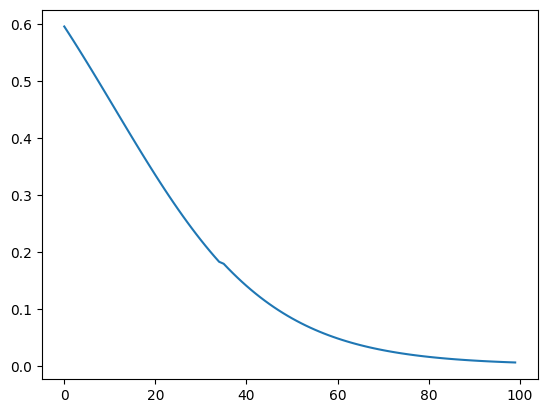

In [152]:
plt.plot(single_losses)

In [153]:
single_losses[-1]

0.006846379175071915

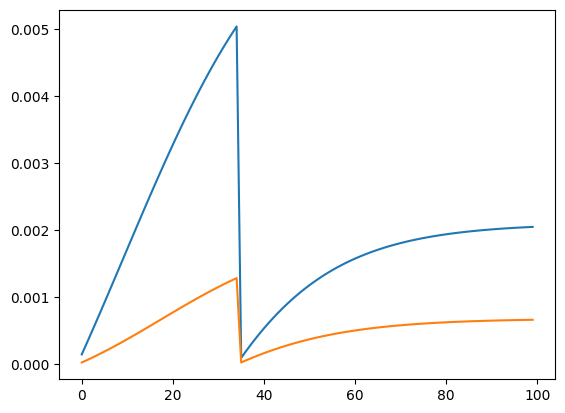

In [154]:
plt.plot(list(zip(*single_unitary_scores))[0])
plt.plot(list(zip(*single_unitary_scores))[1])

extract phase

In [170]:
single_phase = np.conj(matrix_element(psi, single_symmetry_operations, left_unitaries, right_unitaries))

In [37]:
unitary_tol = 0.005

In [38]:
def unitary_test(U):
    return np.max(np.abs(U.conj().T.dot(U)-np.identity(len(U))))

In [39]:
def unitarize_matrix(U):
    L,S,R = np.linalg.svd(U)
    return L.dot(R)

In [156]:
double_losses = list()
double_unitary_scores = list()

double_left_unitaries = sample_unitaries(2)
double_right_unitaries = sample_unitaries(2)

double_symmetry_operations = transverse_cluster_symmetry_operation("both", 10)

In [165]:
for i in range(100):
    update(
        psi,
        double_symmetry_operations,
        double_left_unitaries,
        double_right_unitaries,
        double_losses,
        double_unitary_scores,
        eta=0.03
    )

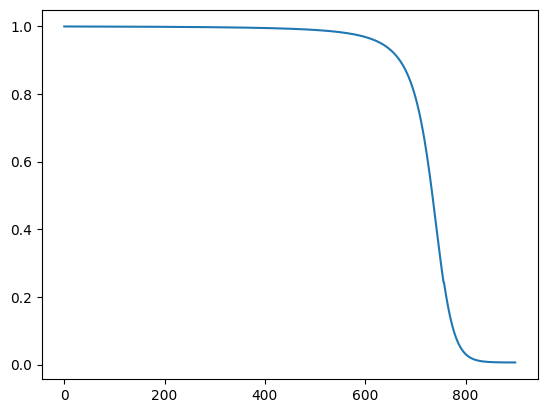

In [166]:
plt.plot(double_losses)

In [171]:
double_phase = np.conj(matrix_element(psi, double_symmetry_operations, double_left_unitaries, double_right_unitaries))

In [172]:
double_phase

(0.6171256903536819+0.7827851758858232j)

# Extract cohomology class

In [178]:
U1 = single_phase*right_unitaries[0]
U2 = double_phase*double_right_unitaries[0]

In [179]:
U1.dot(U2).dot(np.conj(U1.T)).dot(np.conj(U2.T))

array([[-0.98575714-0.06602374j, -0.00320238-0.01708454j],
       [ 0.00320238-0.01708454j, -0.98575714+0.06602374j]])

Close enough to -1... where are the errors coming in?

In [180]:
U1 = single_phase*right_unitaries[0]
U2 = double_phase*double_right_unitaries[1]

In [181]:
U1.dot(U2).dot(np.conj(U1.T)).dot(np.conj(U2.T))

array([[ 0.9876098 -1.14769004e-05j, -0.00226331+1.58932079e-02j],
       [ 0.00226331+1.58932079e-02j,  0.9876098 +1.14769004e-05j]])

But not it's closer to +1...! Although perhaps this comparison doesn't make sense...
I need to work through this analytically.

# Sample losses

In [50]:
random_losses = list()

for i in range(100):
    U1 = unitary_sampler.rvs()
    U2 = unitary_sampler.rvs()
    U3 = unitary_sampler.rvs()
    U4 = unitary_sampler.rvs()

    ops_list = list()

    ops_list.append(to_npc_array(U1))
    ops_list.append(to_npc_array(U2))

    ops_list.extend([npc_X, npc_X]*num_symmetry_site_pairs)
    ops_list.append(to_npc_array(U3))
    ops_list.append(to_npc_array(U4))

    M = psi.expectation_value_multi_sites(ops_list, starting_index-1)

    M_loss = 1-(np.abs(M)**2)
    
    random_losses.append(M_loss)

In [51]:
min(random_losses)

0.9455882983600918